# Primary code to cerate the friendship adn Analysis


=== Erdős–Rényi Network ===
  - Avg Node Degree: 10.50
  - Avg Neighbor Degree: 11.24
  - % Experiencing Paradox: 62.00%
  - Pearson Correlation: 0.14


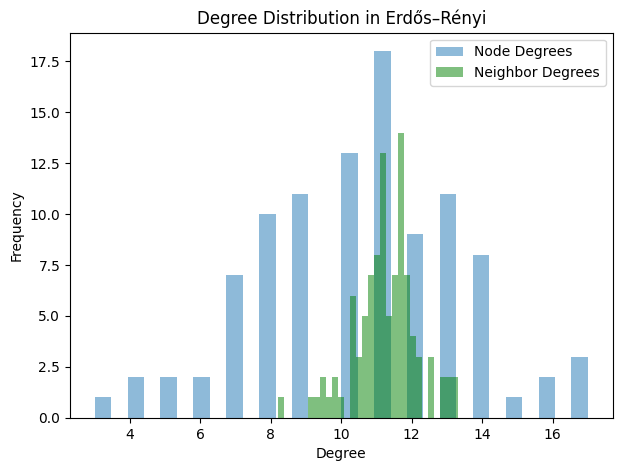


=== Barabási–Albert Network ===
  - Avg Node Degree: 5.82
  - Avg Neighbor Degree: 11.94
  - % Experiencing Paradox: 88.00%
  - Pearson Correlation: -0.25


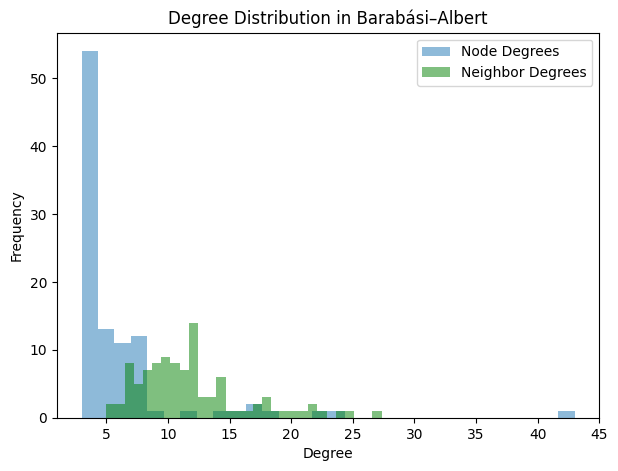


=== Watts–Strogatz Network ===
  - Avg Node Degree: 4.00
  - Avg Neighbor Degree: 4.24
  - % Experiencing Paradox: 55.00%
  - Pearson Correlation: -0.14


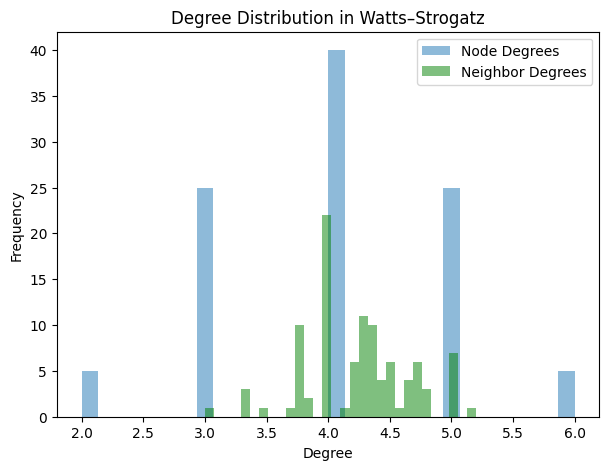

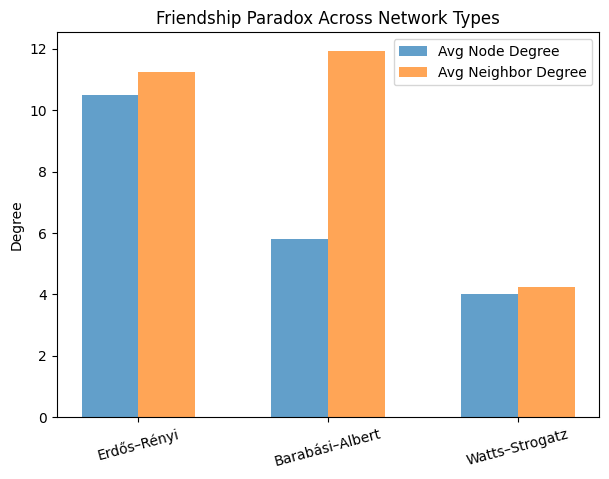

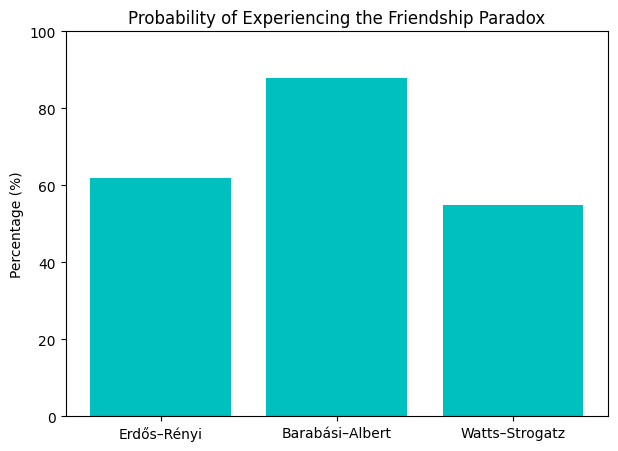

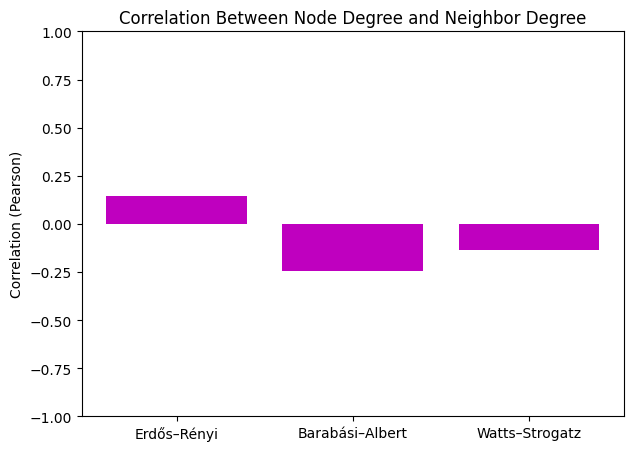

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Function to generate synthetic networks
def generate_networks(n=1000, p=0.1, m=3, k=4, rewiring_p=0.3):
    """
    Generates three types of synthetic networks:
    1. Erdős–Rényi (ER) - Random Graph
    2. Barabási–Albert (BA) - Scale-Free Graph
    3. Watts–Strogatz (WS) - Small-World Graph
    """
    ER = nx.erdos_renyi_graph(n=n, p=p)  # Random network
    BA = nx.barabasi_albert_graph(n=n, m=m)  # Scale-free network
    WS = nx.watts_strogatz_graph(n=n, k=k, p=rewiring_p)  # Small-world network
    return {"Erdős–Rényi": ER, "Barabási–Albert": BA, "Watts–Strogatz": WS}

# Function to compute Friendship Paradox statistics
def analyze_friendship_paradox(G):
    """
    Computes:
    - The average node degree.
    - The average neighbor degree.
    - The percentage of nodes where the Friendship Paradox holds.
    - The correlation between node degrees and neighbor degrees.
    """
    degrees = dict(G.degree())
    neighbor_degrees = []

    paradox_count = 0  # Count of nodes where paradox holds
    total_nodes = len(G.nodes())

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:
            avg_neighbor_degree = np.mean([degrees[n] for n in neighbors])
        else:
            avg_neighbor_degree = 0
        neighbor_degrees.append(avg_neighbor_degree)

        # Count paradox occurrences
        if avg_neighbor_degree > degrees[node]:
            paradox_count += 1

    avg_degree = np.mean(list(degrees.values()))
    avg_neighbor_degree = np.mean(neighbor_degrees)

    # Compute correlation between degree and neighbor's degree
    correlation, _ = pearsonr(list(degrees.values()), neighbor_degrees)

    # Compute probability of experiencing the paradox
    paradox_probability = paradox_count / total_nodes

    return avg_degree, avg_neighbor_degree, paradox_probability, correlation, degrees, neighbor_degrees

# Function to visualize the Friendship Paradox distribution
def plot_friendship_paradox(degrees, neighbor_degrees, network_name):
    """
    Histogram comparison of node degree vs. neighbor degree.
    """
    plt.figure(figsize=(7, 5))
    plt.hist(degrees.values(), bins=30, alpha=0.5, label="Node Degrees")
    plt.hist(neighbor_degrees, bins=30, alpha=0.5, label="Neighbor Degrees", color='g')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution in {network_name}")
    plt.legend()
    plt.show()

# Function to compare network models
def compare_networks(networks):
    """
    Compares Friendship Paradox metrics across multiple network types.
    """
    results = {}

    for name, G in networks.items():
        avg_degree, avg_neighbor_degree, paradox_probability, correlation, degrees, neighbor_degrees = analyze_friendship_paradox(G)
        results[name] = (avg_degree, avg_neighbor_degree, paradox_probability, correlation)

        # Print statistical results
        print(f"\n=== {name} Network ===")
        print(f"  - Avg Node Degree: {avg_degree:.2f}")
        print(f"  - Avg Neighbor Degree: {avg_neighbor_degree:.2f}")
        print(f"  - % Experiencing Paradox: {paradox_probability * 100:.2f}%")
        print(f"  - Pearson Correlation: {correlation:.2f}")

        # Plot distribution comparison
        plot_friendship_paradox(degrees, neighbor_degrees, name)

    # Bar chart comparison
    plt.figure(figsize=(7, 5))
    names = list(results.keys())
    avg_degrees = [results[n][0] for n in names]
    avg_neighbor_degrees = [results[n][1] for n in names]
    paradox_probs = [results[n][2] * 100 for n in names]  # Convert to percentage
    correlations = [results[n][3] for n in names]

    bar_width = 0.3
    x_indexes = np.arange(len(names))

    plt.bar(x_indexes, avg_degrees, width=bar_width, label="Avg Node Degree", alpha=0.7)
    plt.bar(x_indexes + bar_width, avg_neighbor_degrees, width=bar_width, label="Avg Neighbor Degree", alpha=0.7)

    plt.xticks(ticks=x_indexes + bar_width / 2, labels=names, rotation=15)
    plt.ylabel("Degree")
    plt.title("Friendship Paradox Across Network Types")
    plt.legend()
    plt.show()

    # Bar chart for paradox probability
    plt.figure(figsize=(7, 5))
    plt.bar(names, paradox_probs, color='c')
    plt.ylabel("Percentage (%)")
    plt.title("Probability of Experiencing the Friendship Paradox")
    plt.ylim(0, 100)
    plt.show()

    # Bar chart for correlation between node degree and neighbor degree
    plt.figure(figsize=(7, 5))
    plt.bar(names, correlations, color='m')
    plt.ylabel("Correlation (Pearson)")
    plt.title("Correlation Between Node Degree and Neighbor Degree")
    plt.ylim(-1, 1)
    plt.show()

# Main Execution
if __name__ == "__main__":
    synthetic_networks = generate_networks(n=100, p=0.1, m=3, k=4, rewiring_p=0.3)
    compare_networks(synthetic_networks)


# Complicating it with weighted networks


=== Weighted Friendship Paradox Analysis ===
Erdős–Rényi:
  - Weighted Avg Node Degree: 5.51
  - Weighted Avg Neighbor Degree: 5.89



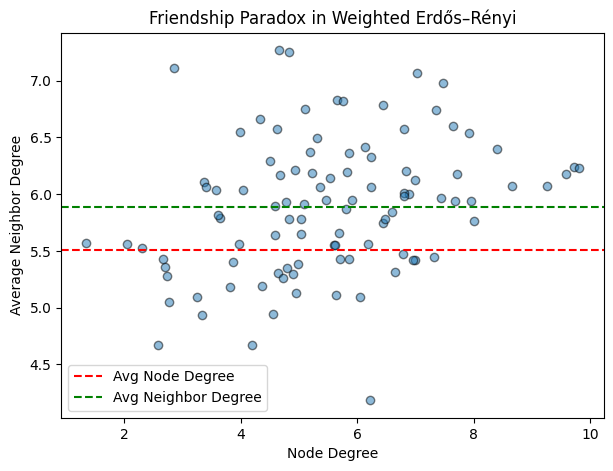

Barabási–Albert:
  - Weighted Avg Node Degree: 3.10
  - Weighted Avg Neighbor Degree: 5.98



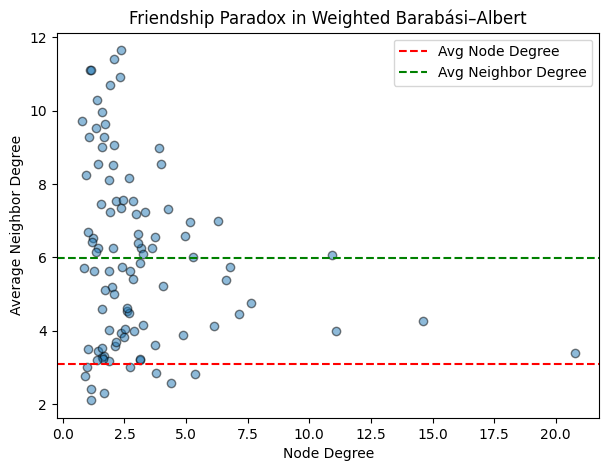

Watts–Strogatz:
  - Weighted Avg Node Degree: 2.29
  - Weighted Avg Neighbor Degree: 2.38



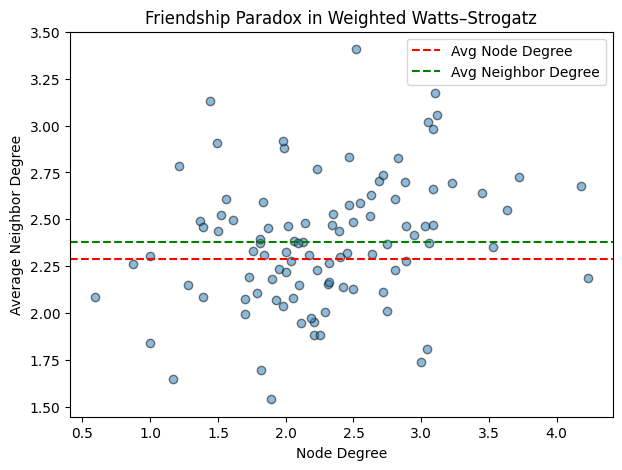

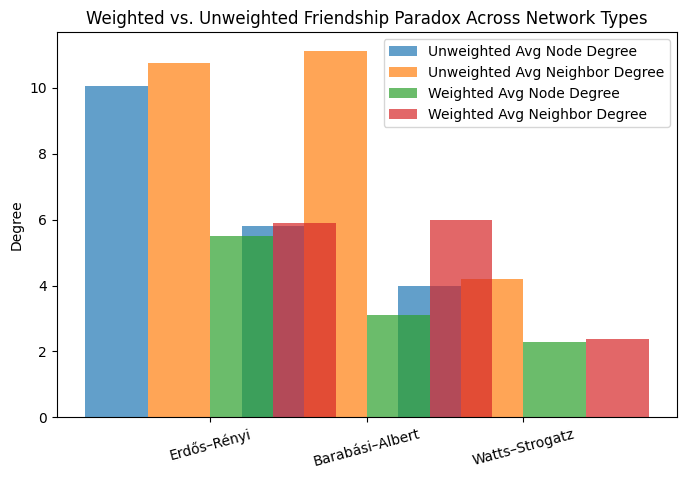

In [ ]:
import random

# Function to add weights to a network
def add_weights_to_graph(G):
    """
    Assigns random weights to edges, simulating stronger/weaker relationships.
    Weights are randomly chosen between 0.1 and 1.0.
    """
    for u, v in G.edges():
        G[u][v]['weight'] = round(random.uniform(0.1, 1.0), 2)
    return G

# Function to compute the weighted Friendship Paradox
def analyze_weighted_friendship_paradox(G):
    """
    Computes the Friendship Paradox using weighted degrees:
    - Weighted degree: sum of edge weights for a node.
    - Weighted neighbor degree: average weighted degree of a node’s neighbors.
    """
    degrees = dict(G.degree(weight='weight'))  # Weighted node degrees
    neighbor_degrees = []

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:
            avg_neighbor_degree = np.mean([degrees[n] for n in neighbors])
        else:
            avg_neighbor_degree = 0
        neighbor_degrees.append(avg_neighbor_degree)

    avg_degree = np.mean(list(degrees.values()))
    avg_neighbor_degree = np.mean(neighbor_degrees)

    return avg_degree, avg_neighbor_degree, degrees, neighbor_degrees

# Generate weighted versions of synthetic networks
weighted_networks = {name: add_weights_to_graph(G.copy()) for name, G in synthetic_networks.items()}

# Compare Weighted Networks
print("\n=== Weighted Friendship Paradox Analysis ===")
for name, G in weighted_networks.items():
    avg_degree, avg_neighbor_degree, degrees, neighbor_degrees = analyze_weighted_friendship_paradox(G)

    print(f"{name}:")
    print(f"  - Weighted Avg Node Degree: {avg_degree:.2f}")
    print(f"  - Weighted Avg Neighbor Degree: {avg_neighbor_degree:.2f}\n")

    # Scatter plot visualization
    plot_friendship_paradox(degrees, neighbor_degrees, f"Weighted {name}")

# Bar chart to compare weighted vs. unweighted networks
plt.figure(figsize=(8, 5))
names = list(weighted_networks.keys())
unweighted_avg_degrees = [analyze_friendship_paradox(synthetic_networks[n])[0] for n in names]
unweighted_avg_neighbor_degrees = [analyze_friendship_paradox(synthetic_networks[n])[1] for n in names]
weighted_avg_degrees = [analyze_weighted_friendship_paradox(weighted_networks[n])[0] for n in names]
weighted_avg_neighbor_degrees = [analyze_weighted_friendship_paradox(weighted_networks[n])[1] for n in names]

bar_width = 0.4
x_indexes = np.arange(len(names))

plt.bar(x_indexes, unweighted_avg_degrees, width=bar_width, label="Unweighted Avg Node Degree", alpha=0.7)
plt.bar(x_indexes + bar_width, unweighted_avg_neighbor_degrees, width=bar_width, label="Unweighted Avg Neighbor Degree", alpha=0.7)
plt.bar(x_indexes + 2*bar_width, weighted_avg_degrees, width=bar_width, label="Weighted Avg Node Degree", alpha=0.7)
plt.bar(x_indexes + 3*bar_width, weighted_avg_neighbor_degrees, width=bar_width, label="Weighted Avg Neighbor Degree", alpha=0.7)

plt.xticks(ticks=x_indexes + 1.5 * bar_width, labels=names, rotation=15)
plt.ylabel("Degree")
plt.title("Weighted vs. Unweighted Friendship Paradox Across Network Types")
plt.legend()
plt.show()


# Time Evolution with Interactive Graph

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation

# Function to simulate a growing network over time
def evolve_network(initial_nodes=10, total_nodes=50, m=2):
    """
    Simulates network growth using a Barabási–Albert model.
    New nodes connect to m existing nodes based on preferential attachment.
    """
    G = nx.barabasi_albert_graph(n=initial_nodes, m=m)  # Start with a small network
    snapshots = [G.copy()]  # Store snapshots of the network over time

    for i in range(initial_nodes, total_nodes):
        new_node = i
        G.add_node(new_node)

        # Preferential attachment: connect to nodes with high degree
        existing_nodes = list(G.nodes())
        degrees = np.array([G.degree(n) for n in existing_nodes])
        probabilities = degrees / degrees.sum()  # Probability proportional to degree

        connections = np.random.choice(existing_nodes, size=m, replace=False, p=probabilities)
        for node in connections:
            G.add_edge(new_node, node)

        snapshots.append(G.copy())  # Save snapshot

    return snapshots

# Function to create an interactive network with Plotly
def plot_interactive_network(G):
    """
    Generates an interactive Plotly network visualization.
    """
    pos = nx.spring_layout(G, seed=42)
    edge_x = []
    edge_y = []

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines'
    )

    node_x = []
    node_y = []
    node_text = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f"Node {node}<br>Degree: {G.degree(node)}")

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(size=10, color="blue"),
        text=node_text
    )

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title="Interactive Network Visualization",
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                    ))

    fig.show()

# Generate the network snapshots first
snapshots = evolve_network(initial_nodes=10, total_nodes=50, m=2)

# Show final state as an interactive graph
print("\n=== Interactive Network (Final State) ===")
plot_interactive_network(snapshots[-1])



=== Interactive Network (Final State) ===


In [1]:
import plotly.graph_objects as go
import networkx as nx
import numpy as np

# Function to generate network snapshots
def evolve_network(initial_nodes=10, total_nodes=50, m=2):
    """
    Simulates network growth using a Barabási–Albert model.
    New nodes connect to m existing nodes based on preferential attachment.
    """
    G = nx.barabasi_albert_graph(n=initial_nodes, m=m)  # Start with a small network
    snapshots = [G.copy()]  # Store snapshots over time

    for i in range(initial_nodes, total_nodes):
        new_node = i
        G.add_node(new_node)

        # Preferential attachment: connect to nodes with high degree
        existing_nodes = list(G.nodes())
        degrees = np.array([G.degree(n) for n in existing_nodes])
        probabilities = degrees / degrees.sum()  # Probability proportional to degree

        connections = np.random.choice(existing_nodes, size=m, replace=False, p=probabilities)
        for node in connections:
            G.add_edge(new_node, node)

        snapshots.append(G.copy())  # Save snapshot

    return snapshots

# Function to create an interactive network visualization with a time slider
def plot_network_with_slider(snapshots):
    """
    Creates an interactive Plotly graph where users can slide through time to see network evolution.
    """
    fig = go.Figure()

    # Precompute node positions for final step (for layout consistency)
    pos = nx.spring_layout(snapshots[-1], seed=42)

    for i, G in enumerate(snapshots):
        edge_x = []
        edge_y = []
        for edge in G.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])

        node_x = []
        node_y = []
        node_text = []
        for node in G.nodes():
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)
            node_text.append(f"Node {node}<br>Degree: {G.degree(node)}")

        # Create traces
        edge_trace = go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=0.5, color='#888'),
            hoverinfo='none',
            mode='lines',
            visible=False  # Initially hidden
        )

        node_trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers',
            hoverinfo='text',
            marker=dict(size=10, color="blue"),
            text=node_text,
            visible=False  # Initially hidden
        )

        # Add traces to figure
        fig.add_trace(edge_trace)
        fig.add_trace(node_trace)

    # Make the first snapshot visible by default
    fig.data[0].visible = True
    fig.data[1].visible = True

    # Create slider steps
    steps = []
    for i in range(len(snapshots)):
        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)}]  # Hide all traces
        )
        step["args"][0]["visible"][2*i] = True  # Show edges
        step["args"][0]["visible"][2*i + 1] = True  # Show nodes
        step["label"] = f"Step {i+1}"
        steps.append(step)

    # Add slider to figure
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Time Step: "}
    )]

    fig.update_layout(
        title="Network Evolution Over Time",
        showlegend=False,
        sliders=sliders,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    )

    fig.show()

# Generate the evolving network snapshots
snapshots = evolve_network(initial_nodes=10, total_nodes=50, m=2)

# Show interactive graph with slider
plot_network_with_slider(snapshots)
